# Исследование рекламных кампаний


**Цель работы**: оценка эффективности проведенных рекламных кампаний относительно каждого байера.

**Задачи в ходе работы**:
1. Изучить представленные данные;
2. Расчет основных метрик по кампаниям;
3. Сравнение расходов и выручки по кампаниям.


Данные по работе рекламных кампаний, запущенных медиабайерами для привлечения пользователей в приложение.

Имеющиеся поля:
* Campaign_id - ID кампании;
* Geo - геопозиция, на которую настроена рекламная кампания;
* Buyer - байер, выполнивший запуск;
* Impressions - количество показов рекламных объявлений;
* Clicks - количество кликов;
* Installs - количество установок;
* Registrations - количество регистраций;
* Spend - Затраченная сумма;
* Revenue_ad (1d/7d/30d) - Выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Revenue_in_app (1d/7d/30d) - Выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
* Payers (1d/7d/30d) - Количество покупателей в приложении на 1/7/30 день их жизни

## Исходные данные


In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns

import math

!pip install circlify --quiet
import circlify

pd.options.mode.chained_assignment = None

In [2]:
# загрузка данных
df = pd.read_csv('/content/drive/MyDrive/data/test_data.csv')

In [3]:
# просмотр данных
df.head()

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,"3208,440002","1163,521408","162,220001",64,"1381,310062","199,749999",79,"1527,013835","276,629998",83
1,2,north america,buyer_2,245542,6306,3401,2448,"1569,519999","833,059639","37,25",17,"1200,964697","69,340001",19,"1449,001828","120,250001",22
2,3,north america,buyer_1,1281103,35724,13315,8101,"1231,999998","459,6826","3,26",4,"524,987826","24,7",6,"572,633765","24,7",6
3,4,north america,buyer_1,215538,9987,3119,1857,"1228,129999","602,77816","26,13",11,"830,113889","33,439999",12,"1042,831595","57,530002",12
4,5,western europe,buyer_2,335878,7343,3952,2955,"872,570005","427,807238","19,030001",4,"577,039081","20,640001",5,"714,554179","32,150001",6


In [4]:
# вывод информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Campaign_id        87 non-null     int64 
 1   Geo                87 non-null     object
 2   Buyer              87 non-null     object
 3   Impressions        87 non-null     int64 
 4   Clicks             87 non-null     int64 
 5   Installs           87 non-null     int64 
 6   Registrations      87 non-null     int64 
 7   Spend              87 non-null     object
 8   Revenue_ad1d       87 non-null     object
 9   Revenue_in_app1d   87 non-null     object
 10  Payers1d           87 non-null     int64 
 11  Revenue_ad7d       87 non-null     object
 12  Revenue_in_app7d   87 non-null     object
 13  Payers7d           87 non-null     int64 
 14  Revenue_ad30d      87 non-null     object
 15  Revenue_in_app30d  87 non-null     object
 16  Payers30d          87 non-null     int64 
dtyp

In [5]:
# перевлд наименования столбцов к единому типу
df.columns = (
    df.columns.str.lower()
    .str.replace(',', '')
    .str.replace('-', '_')
    .str.replace(' ', '_')
    )

In [6]:
# перевод числовых значений в соответствующих тип данных
for i in ['spend', 'revenue_ad1d', 'revenue_in_app1d', 'revenue_ad7d', 'revenue_in_app7d', 'revenue_ad30d', 'revenue_in_app30d']:
  df[i] = df[i].str.replace(",", ".")
  df[i] = df[i].astype(float)

In [7]:
# поиск дубликатов
df.duplicated().sum()

0

In [8]:
# поиск пропусков в данных
df.isnull().sum()

campaign_id          0
geo                  0
buyer                0
impressions          0
clicks               0
installs             0
registrations        0
spend                0
revenue_ad1d         0
revenue_in_app1d     0
payers1d             0
revenue_ad7d         0
revenue_in_app7d     0
payers7d             0
revenue_ad30d        0
revenue_in_app30d    0
payers30d            0
dtype: int64

In [9]:
# вывод уникальных регионов
df['geo'].unique()

array(['north america', 'western europe', 'cis', 'north africa',
       'latin america', 'tropical africa', 'australia oceania'],
      dtype=object)

In [10]:
# вывод уникальных медиабайеров
df['buyer'].unique()

array(['buyer_1', 'buyer_2', 'buyer_3', 'buyer_4', 'buyer_5'],
      dtype=object)

In [11]:
# количество уникальных кампаний
df['campaign_id'].nunique()

87

In [12]:
# статистика проведения кампаний по регионам
df.pivot_table(index=['geo'], values='campaign_id', aggfunc='count').sort_values(by='campaign_id', ascending=False)

,campaign_id
geo,
north america,48
western europe,22
cis,10
latin america,3
north africa,2
australia oceania,1
tropical africa,1


In [13]:
# статистика проведения байерами кампаний
df.pivot_table(index=['buyer'], values='campaign_id', aggfunc='count').sort_values(by='campaign_id', ascending=False)

,campaign_id
buyer,
buyer_2,39
buyer_1,18
buyer_4,16
buyer_5,8
buyer_3,6


In [14]:
# статистика проведения байерами кампаний по регионам
df.pivot_table(index=['buyer', 'geo'], values='campaign_id', aggfunc='count')

campaign_id
buyer   geo                           
buyer_1 cis                          2
        latin america                3
        north america               12
        tropical africa              1
buyer_2 cis                          5
        north america               17
        western europe              17
buyer_3 north america                6
buyer_4 cis                          2
        north america               11
        western europe               3
buyer_5 australia oceania            1
        cis                          1
        north africa                 2
        north america                2
        western europe               2

### Вывод

Для исследований представлены 5 медиабайеров, запускающих рекламные кампании в 7 регионов мира. Из регионов представлены: Северная Америка, Западная Европа, страны СНГ, Северная Африка, Латинская Америка, страны Экваториальной Африки, Австралия и Океания.

Наиболее привлекательным регионом для проведения кампании выявлена Северная Америка (48). Самый активный байер - `buyer_2`, 39 кампаний. Наибольший охват регионов представляет `buyer_5`, проводивший кампании в 5ти регионах, и `buyer_1`, проводивший в 4х регионах.

## Расчет маркетинговых метрик

In [15]:
# функция для определения цвета
def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

pal_vi = get_color('viridis', len(df['buyer'].unique()))
pal_c = get_color('plasma_r', len(df['geo'].unique()))
pal_spec = get_color('Spectral', len(df['geo'].unique()))
pal_hsv = get_color('hsv', len(df['geo'].unique()))

In [16]:
# функция для построения пузырьковой диаграммы top-5 кампаний
def show_cirkles(df, parametr, title_df, sort):

    df = df.sort_values(by=parametr, ascending=sort).head(5)

    # столбцы по осям X и Y
    df['X'] = [1]*len(df)
    list_y = list(range(0,len(df)))
    list_y.reverse()
    df['Y'] = list_y

    # столбец меток
    df['labels'] = ['<b>'+str(i)+'<br>'+format(j, ",") +'<br>' +str(k)+'<br>'+str(l)
                    for i,j,k,l in zip(
                        df['campaign_id'],
                        df[parametr],
                        df['buyer'],
                        df['geo']
                        )
                    ]

    fig = px.scatter(df, x='X', y='Y',
                 color=parametr, color_discrete_sequence=pal_hsv,
                 size=parametr, text='labels', size_max=50,
                 title=title_df)

    fig.update_layout(width=650, height=600,
                  margin = dict(t=50, l=0, r=0, b=30),
                  showlegend=False
                 )

    fig.update_traces(textposition='middle right')
    fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
    fig.update_yaxes(showgrid=False, zeroline=False, visible=False)

    fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})
    fig.show()

In [17]:
# функция для построения диаграмм
def show_hist(df, x_val, y_val, func, title_1='', title_2='', c=1):

    fig = px.scatter(df,
                 x=y_val, y=x_val,
                 color =x_val, color_discrete_sequence=pal_c,
                 width=800, height=400)

    fig.update_layout(title=title_1,
                  xaxis_title='',
                  yaxis_title='')

    if c == 1:
        fig.show()

    df = df.groupby(x_val).agg({y_val:func}).sort_values(by=y_val).reset_index().round(2)

    if x_val == 'geo':
        cds = pal_c
    elif x_val == 'buyer':
        cds = pal_vi

    fig = px.bar(df,
             width=800, height=400,
             x=x_val,
             y=y_val,
             text=y_val,
             color =x_val,
             color_discrete_sequence=cds
            )

    fig.update_layout(title=title_2,
                  xaxis_title='',
                  yaxis_title='')
    fig.show()

### Компании по регионам и байерам

In [18]:
# группируем таблицу сводную таблицу по регионам
df_geo = df.groupby('geo').agg({'campaign_id':'count'}).reset_index()

# строим круговую диаграмму
fig = px.pie(df_geo, values='campaign_id', names='geo', color ='geo', color_discrete_sequence=pal_c)
fig.update_layout(width=800, height=600,
                  title='Распределение рекламных кампаний по регионам',
                  )

In [19]:
# группируем таблицу сводную таблицу по байерам
df_buyer = df.groupby('buyer').agg({'campaign_id':'count'}).reset_index()

# строим круговую диаграмму
fig = px.pie(df_buyer, values='campaign_id', names='buyer', color ='buyer', color_discrete_sequence=pal_vi)
fig.update_layout(width=800, height=600,
                  title='Распределение рекламных кампаний по байерам',
                  )

### Показы

Показы — число раз, когда рекламные объявления появились на экране (число показов ≠ число клиентов, увидевших рекламу, если один и тот же клиент увидел объявление сто раз, это сто показов).

In [20]:
df_show_geo = df.groupby('geo').agg(count_impressions=('impressions', 'sum')).reset_index()
df_show_geo = df_show_geo.sort_values(by='count_impressions', ascending=False)
df_show_geo

,geo,count_impressions
4,north america,6801913
3,north africa,948653
6,western europe,827297
1,cis,729586
2,latin america,522450
5,tropical africa,90894
0,australia oceania,2185


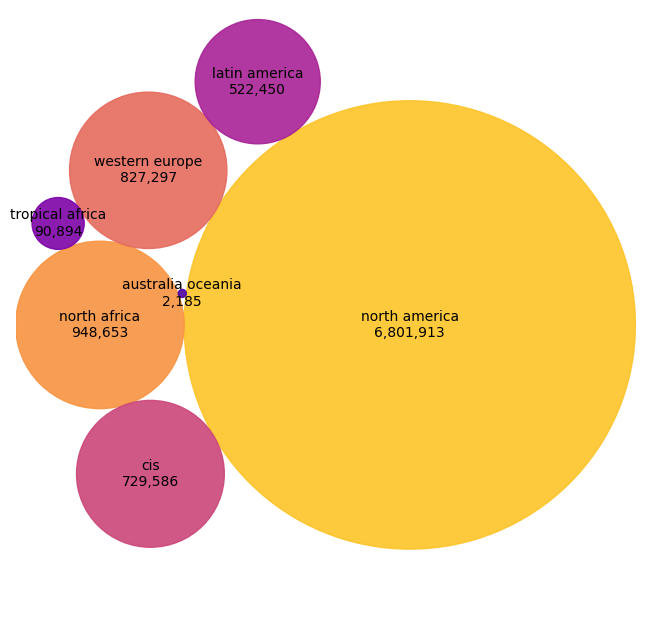

In [21]:
# рассчитываем позиции кругов для диаграммы
circles = circlify.circlify(df_show_geo['count_impressions'].tolist(),
                            show_enclosure=False,
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
circles.reverse()

fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Рисуем круги
for circle, label, emi, color in zip(circles, df_show_geo['geo'], df_show_geo['count_impressions'], pal_c):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color))
    plt.annotate(label +'\n'+ format(emi, ","), (x,y), size=10, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [22]:
df_show_buyer = df.groupby('buyer').agg(count_impressions=('impressions', 'sum')).reset_index()
df_show_buyer = df_show_buyer.sort_values(by='count_impressions', ascending=False)
df_show_buyer

,buyer,count_impressions
0,buyer_1,6239438
1,buyer_2,1929911
4,buyer_5,1105119
2,buyer_3,336414
3,buyer_4,312096


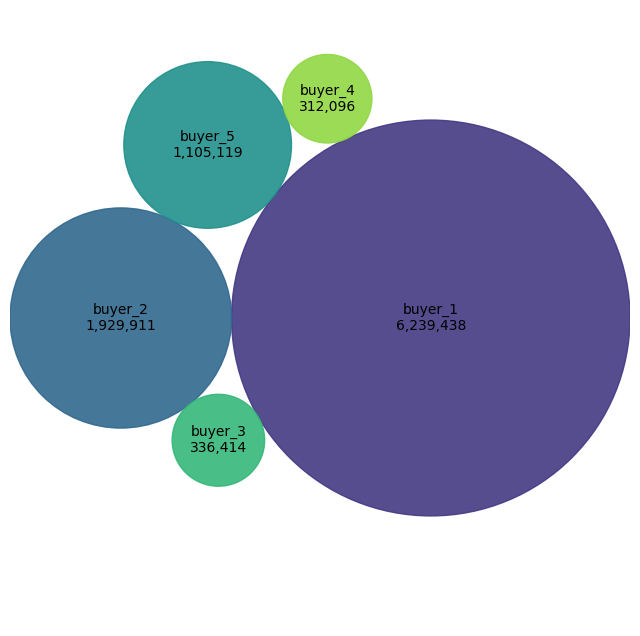

In [23]:
# рассчитываем позиции кругов для диаграммы
circles2 = circlify.circlify(df_show_buyer['count_impressions'].tolist(),
                            show_enclosure=False,
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
circles2.reverse()

fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles2)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Рисуем круги
for circle, label, emi, color in zip(circles2, df_show_buyer['buyer'], df_show_buyer['count_impressions'], pal_vi):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color))
    plt.annotate(label +'\n'+ format(emi, ","), (x,y), size=10, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
# строим диаграмму топ-5 кампаний по количеству охваченной аудитории
show_cirkles(df, 'impressions','ТОП-5 кампаний по просмотрам', False)

### Сlick-through rate, коэффициент кликабельности

Метрика показывает, какой процент увидевших рекламное объявление кликнул на него. По CTR можно судить о том, насколько привлекательны объявления и насколько они отвечают запросам пользователей.

Расчет:

**CTR = Визиты / Показы * 100%**

In [25]:
# рассчитываем коэффициент кликабельности
df['ctr'] = round(df['clicks']/df['impressions']*100,2)

In [26]:
# визуализация коэффициента кликабельности по регионам
show_hist(df, 'geo', 'ctr','mean', 'CTR по регионам', 'Среднее значение CTR по регионам')

In [27]:
# # визуализация коэффициента кликабельности по медиабайерам
show_hist(df, 'buyer', 'ctr', 'mean', 'CTR по медиабайерам' , 'Среднее значение CTR по медиабайерам')

Наибольшие коэффициенты кликабельности соответствуют байерам 1, 2 и 4, и их рекламной деятельности в Северной и Латинской Америке. Большая часть кампаний имеет `CTR` меньше 4%.

### CPC (cost per click, цена за клик)

По CPC можно судить, эффективно ли вы тратится рекламный бюджет и не переплачивает ли рекламодатель за клики.

Расчет:

**CPC = Расходы / Визиты**

In [28]:
# рассчитываем стоимость клика
df['cpc']=round(df['spend']/df['clicks'], 2)

In [29]:
# визуализация средней стоимости по регионам
show_hist(df, 'geo', 'cpc', 'mean', '', 'Среднее значение стоимости клика по регионам', 0)

In [30]:
# визуализация средней стоимости по медиабайерам
show_hist(df, 'buyer', 'cpc', 'mean', '', 'Среднее значение стоимости клика по медиабайерам', 0)

In [31]:
# топы кампаний по стоимости
show_cirkles(df, 'cpc','ТОП-5 "дорогих" кампаний по строимости за клик', False),
show_cirkles(df, 'cpc','ТОП-5 "дешевых" кампаний по строимости за клик', True)

### CR1 Конверсия в установку

CR1 — конверсия в установку, то есть доля установивших приложение от общего числа кликов.

Расчет:

**Установки / Клики * 100%**

In [32]:
# рассчитываем коэффициент конверсии по количеству зарегистрировавшихся пользователей от количества увидевших рекламу
df['cr1'] = round(df['installs']/df['impressions']*100,2)

In [33]:
# визуализация конверсии в установку по регионам
show_hist(df, 'geo', 'cr1', 'mean', 'Конверсия в установку по регионам', 'Среднее значение конверсии в установку по регионам')

In [34]:
# визуализация конверсии в установку по медиабайерам
show_hist(df, 'buyer', 'cr1', 'mean', 'Конверсия в установку по медиабайерам', 'Среднее значение конверсии в установку по медиабайерам')

### CPI Стоимость установки

In [35]:
# стоимость установки приложения
df['cpi']=round(df['spend']/df['installs'], 2)

In [36]:
# средняя стоимость по регионам
show_hist(df, 'geo', 'cpi', 'mean', '', 'Среднее значение стоимости установки приложения по регионам', 0)

In [37]:
# средняя стоимость по медиабайерам
show_hist(df, 'buyer', 'cpi', 'mean', '', 'Среднее значение стоимости установки приложения по медиабайерам', 0)

In [38]:
# топы кампаний по стоимости
show_cirkles(df, 'cpi','ТОП-5 "дорогих" кампаний по строимости установки приложения', False),
show_cirkles(df, 'cpi','ТОП-5 "дешевых" кампаний по строимости установки приложения', True)

### CR2 Конверсия в регистрацию

CR2 — конверсия в регистрацию, то есть доля зарегестрированных от общего числа кликов.

Расчет:

**Регистрации / Клики * 100%**

In [39]:
# рассчитываем коэффициент конверсии по количеству зарегистрировавшихся пользователей от количества увидевших рекламу
df['cr2'] = round(df['registrations']/df['impressions']*100,2)

In [40]:
# визуализация конверсии в регистрацию по регионам
show_hist(df, 'geo', 'cr2', 'mean', 'Конверсия в регистрацию по регионам', 'Среднее значение конверсии в регистрацию по регионам')

In [41]:
# визуализация конверсии в регистрацию по медиабайерам
show_hist(df, 'buyer', 'cr2', 'mean', 'Конверсия в регистрацию по медиабайерам', 'Среднее значение конверсии в регистрацию по медиабайерам')

В значениях конверсии по количеству регестраций лидируют Северная Америка, кампания в Латинской Америке и кампания в СНГ. Среди байеров высокие значения конверсии принадлежат `buyer_4`, `buyer_1`, `buyer_2`.

### CPR Стоимость регистрации



По CPR (cost per registrations) можно судить, эффективно ли тратится рекламный бюджет и не переплачивает ли рекламодатель за регистрацию

Расчет:

**Расходы / Регистрации**

In [42]:
# стоимость регистрации пользователя
df['cpr']=round(df['spend']/df['registrations'], 2)

In [43]:
# средняя стоимость по регионам
show_hist(df, 'geo', 'cpr', 'mean', '', 'Среднее значение стоимости регистрации по регионам', 0)

In [44]:
# средняя стоимость по медиабайерам
show_hist(df, 'buyer', 'cpr', 'mean', '', 'Среднее значение стоимости регистрации по медиабайерам', 0)

In [45]:
# топы кампаний по стоимости
show_cirkles(df, 'cpr','ТОП-5 "дорогих" кампаний по строимости регистрации', False),
show_cirkles(df, 'cpr','ТОП-5 "дешевых" кампаний по строимости регистрации', True)

Стоимость целевого действия, в данном случае регестрации пользователя, низкая в Экваториальной, Северной Африке и Латинской Америке, высокая же в Австралии. Среди байеров наибольшее медианное значение соответствует третьему, наименьшее первому.

### ARPU (Average Revenue Per User)

Средний доход от посетителя за определенный период — метрика, которая показывает, сколько клиент в среднем тратит на продукт за определенный период времени: день, месяц или год.

In [46]:
# общая выручка с рекламы и покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни
df['revenue_1d'] = round(df['revenue_ad1d'] + df['revenue_in_app1d'],2)
df['revenue_7d'] = round(df['revenue_ad7d'] + df['revenue_in_app7d'],2)
df['revenue_30d'] = round(df['revenue_ad30d'] + df['revenue_in_app30d'],2)

In [47]:
# средний доход с зарегестрированных пользователей, отношение выручки к количеству зарегестрированных
df = df.fillna(0)
df['arpu'] = round(df['revenue_30d']/df['registrations'],2)

df_arpu = df[['campaign_id', 'geo', 'buyer', 'cpr', 'arpu', 'revenue_30d', 'spend']]

In [48]:
# средняя стоимость по регионам
show_hist(df, 'geo', 'arpu', 'mean', '', 'Среднее значение среднего дохода от пользователя по регионам', 0)

In [49]:
# средняя стоимость по медиабайерам
show_hist(df, 'buyer', 'arpu', 'mean', '', 'Среднее значение среднего дохода от пользователя по медиабайерам', 0)

In [50]:
# поставим флаг на те кампании, в которых стоимость привлечения меньше
df_arpu['dif'] = 0
mask = df_arpu.arpu > df_arpu.cpr
df_arpu.loc[mask, 'dif'] = 1

In [51]:
# рассчитываем для медиабайеров количество успешных и неуспешных кампаний
df_arpu_camp = df_arpu.groupby(['buyer', 'dif']).agg(count_camp=('campaign_id', 'count')).reset_index()
df_arpu_camp

,buyer,dif,count_camp
0,buyer_1,0,18
1,buyer_2,0,36
2,buyer_2,1,3
3,buyer_3,0,4
4,buyer_3,1,2
5,buyer_4,0,10
6,buyer_4,1,6
7,buyer_5,0,8


In [52]:
# функция для отображения количества успешных и неуспешных кампаний

def success_camp(df):

    # добавляем запись, если отсутствуют кампании, то ставим 0
    for i in df['buyer'].unique():
        if df.query('buyer == @i and dif == 1')['dif'].count() == 0:
            df.loc[len(df.index)] = [i, 1, 0,]
        if df.query('buyer == @i and dif == 0')['dif'].count() == 0:
            df.loc[len(df.index)] = [i, 0, 0,]
    # сортируем таблицу
    df = df.sort_values(by='buyer')
    # лист для оси x
    x_list = df['buyer'].unique()
    # лист количества успешных кампаний для оси y
    y_list_1 = list(df.query('dif == 1')['count_camp'])
    # лист количества неуспешных кампаний для оси y
    y_list_0 = list(df.query('dif == 0')['count_camp'])
    # лист начала баров для y_list_0
    base_0 = [x*(-1) for x in y_list_0]

    # строим диаграмму
    fig = go.Figure()

    # окупились кампании 1
    fig.add_trace(go.Bar(x=x_list, y=y_list_1,
                base=0,
                marker_color='teal',
                text=y_list_1,
                name='количество успешных кампаний'))
    # не окупились 0
    fig.add_trace(go.Bar(x=x_list, y=y_list_0,
                base=base_0,
                marker_color='crimson',
                text=y_list_0,
                name='количество неуспешных кампаний'
                ))

    fig.update_layout(title='Кампании медиабайеров',
                  width=1200, height=800,
                  )
    fig.show()

In [53]:
success_camp(df_arpu_camp)

Для всех медиабайеров количество неуспешных кампаний превышает количество успешных.ю т.е. окупившихся кампаний. Также если сравнивать между собой, то дела buyer_4 складываются лучше, отсальных, для него относительная разница в кампаниях самая маленькая, 37,5% успешных и 62,5% неуспешных кампаний, а для buyer_3: 33,3 успешных и 66,6 неуспешных кампаний.

### ARPPU (Average Revenue Per Paying User)

In [54]:
# средний доход с платящих пользователей, отношение выручки с покупок пользователей к количеству покупателей
df = df.fillna(0)
df['arppu_1'] = round(df['revenue_in_app1d']/df['payers1d'],2)
df['arppu_7'] = round(df['revenue_in_app7d']/df['payers7d'],2)
df['arppu_30'] = round(df['revenue_in_app30d']/df['payers30d'],2)

# стоимость привлечения платящего пользователя
df['cpp'] = round(df.query('payers30d > 0')['spend']/df.query('payers30d > 0')['payers30d'],2)
df['cpp'] = df['cpp'].fillna(0)

In [55]:
df.pivot_table(index=['buyer', 'geo'], values=('arppu_1', 'arppu_7', 'arppu_30', 'cpp') , aggfunc='mean').round(2)

arppu_1  arppu_30  arppu_7    cpp
buyer   geo                                                 
buyer_1 cis                   1.44      1.27     1.44  29.73
        latin america         1.02      1.65     1.02  50.98
        north america         2.09      3.26     2.54  41.73
        tropical africa        NaN       NaN      NaN   0.00
buyer_2 cis                   2.50      3.20     2.49  20.20
        north america         3.63      4.44     3.67  56.35
        western europe        2.40      2.86     1.92  29.19
buyer_3 north america         4.85      4.98     5.21  87.61
buyer_4 cis                   1.49      7.48     1.49  10.22
        north america         4.19      6.00     4.31  37.77
        western europe         NaN       NaN      NaN   0.00
buyer_5 australia oceania      NaN       NaN      NaN   0.00
        cis                   3.10      3.10     3.10  61.76
        north africa           NaN       NaN      NaN   0.00
        north america          NaN      0.69      NaN  22.29
        western europe         NaN       NaN      NaN   0.00

`buyer_1`

* По странам СНГ, Северной и Латинской Америкке доход от покупок пользователя выше затрат на его привлечение.
* В Экваториальной Африке нет покупателей в течение 30 дней.

`buyer_2`

По всем регионам рекламных компаний доход от новых покупателей выше затрат на их привлечение.

`buyer_3`

Высокий доход с пользователя по отношению к затратам на его привлечение.

`buyer_4`

* По странам СНГ 1ю и 7ю неделю небольшое превышения дохода к расходам на пользователя, но к 30 дню значительный рост с 7.48 доход и 0.95 расход.
* В восточной Европе нет покупателей, при расходах на пользователя 0.34.

`buyer_5`

* Стабильный показатель дохода на протяжении 30 дней 3.1 от пользователя к расходу 0,37.
* В Северной Америке к 30му дню средний доход от покупателя 0.69, что меньше затрат на его привлечение, равное 1.48.
* В Австралии, Северной Африке и Западной Европе нет покупателей.

### ROI (return on investment, коэффициент возврата инвестиций)

ROI показывает, работаете реклама в плюс или в убыток. Если ROI больше 0% — в плюс, меньше 0% — в убыток.

Расчет:

**(Прибыль - Расходы на рекламу) / Расходы на рекламу * 100%**

In [56]:
# рассчитываем определим окупаемость рекламных кампаний ROI на 30й день
df['roi'] = round((df['revenue_30d'] - df['spend'])/df['spend'] * 100, 2)

In [57]:
# визуализация окупаемости кампании по регионам
show_hist(df, 'geo', 'roi', 'mean', 'ROI по регионам', 'Среднее значение ROI по регионам')

In [58]:
# визуализация окупаемости кампании по медиабайерам
show_hist(df, 'buyer', 'roi', 'mean', 'ROI по медиабайерам', 'Среднее значение ROI по медиабайерам')

In [59]:
# самые низкие показатели ROI
df[['geo', 'buyer', 'campaign_id', 'roi']].sort_values(by='roi').head()

,geo,buyer,campaign_id,roi
67,north america,buyer_2,68,-98.56
64,north america,buyer_1,65,-97.81
79,western europe,buyer_2,80,-96.26
80,australia oceania,buyer_5,81,-94.39
58,cis,buyer_2,59,-93.53


Низкие показатели окупаемости приходятся на Северную Америку с ROI= -98.56, Восточную Европу -  -97.81, Австралию и СНГ с ROI -94.39 и -93.53.

In [60]:
# наиболее успешные кампании
df.query('roi > 100')[['geo', 'buyer', 'campaign_id', 'roi']]

,geo,buyer,campaign_id,roi
29,western europe,buyer_2,30,114.34
62,north america,buyer_4,63,124.10


In [61]:
# окупившиеся кампании
df.query('roi > 0')[['geo', 'buyer', 'campaign_id', 'roi']]

,geo,buyer,campaign_id,roi
7,north america,buyer_3,8,56.96
12,western europe,buyer_2,13,21.97
24,north america,buyer_3,25,34.24
29,western europe,buyer_2,30,114.34
30,north america,buyer_4,31,47.90
32,north america,buyer_4,33,38.36
62,north america,buyer_4,63,124.10
63,north america,buyer_4,64,9.49
68,north america,buyer_4,69,16.77
69,western europe,buyer_2,70,9.88


Самыми успешными кампаниями с возвращением вложений более чем в два раза являются кампания 30 у байера 2 в Восточной Европе и кампания 63 у байера 4 в Северной Америке.

### Расходы и выручка медиабайеров


In [62]:
# подготовим таблицу для изучения выручки
df_rev = df.groupby('buyer').agg({'revenue_ad30d':'sum', 'revenue_in_app30d':'sum', 'revenue_30d':'sum', 'spend':'sum'}).reset_index().round(2)

# график по
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_rev['buyer'],
    y=df_rev['spend'],
    name='Расходы',
    marker_color='crimson'
))
# график по
fig.add_trace(go.Bar(
    x=df_rev['buyer'],
    y=df_rev['revenue_30d'],
    name='Общая выручка',
    marker_color='teal'
))
# график по
fig.add_trace(go.Bar(
    x=df_rev['buyer'],
    y=df_rev['revenue_ad30d'],
    name='Выручка от рекламы',
    marker_color='darkseagreen'
))

# график по
fig.add_trace(go.Bar(
    x=df_rev['buyer'],
    y=df_rev['revenue_in_app30d'],
    name='Выручка от покупок',
    marker_color='palegreen'
))

fig.update_layout(title='Распределение выручки медиабайеров',
                  xaxis_title='Медиабайер',
                  yaxis_title='Количество средств, р',
                  width=1200, height=600)
fig.show()

По общей выручке наиболее успешен buyer_3, выручки только от рекламы вернула все вложения в кампании.

### Наиболее успешный медиабайер по проведению рекламных кампаний.

In [63]:
# кампании, окупившиеся на первый день
df.query('revenue_1d > spend	')[['buyer','campaign_id', 'geo', 'spend', 'revenue_1d']].reset_index()

,index,buyer,campaign_id,geo,spend,revenue_1d
0,62,buyer_4,63,north america,29.92,34.16


Одна кампания в Северной Америке от медиабайера 1 окупилась за 1 день.

In [64]:
# кампании, окупившиеся на седьмой день
df.query('revenue_7d > spend	& spend > revenue_1d')[['buyer','campaign_id', 'geo', 'spend', 'revenue_7d']].reset_index()

,index,buyer,campaign_id,geo,spend,revenue_7d
0,7,buyer_3,8,north america,521.509998,523.70
1,29,buyer_2,30,western europe,137.100000,182.52
2,30,buyer_4,31,north america,136.879999,161.92
3,32,buyer_4,33,north america,116.750000,126.09
4,63,buyer_4,64,north america,28.230000,30.63


Всего пять кампаний окупилось к седьмому дню, преимущественно в Северной Америке, и одна в Западной Европе.

In [65]:
# кампании, окупившиеся на тридцатый день
df.query('revenue_30d > spend	& spend > revenue_7d')[['buyer','campaign_id', 'geo', 'spend', 'revenue_30d']].reset_index()

,index,buyer,campaign_id,geo,spend,revenue_30d
0,12,buyer_2,13,western europe,384.739998,469.25
1,24,buyer_3,25,north america,153.510000,206.07
2,68,buyer_4,69,north america,24.629999,28.76
3,69,buyer_2,70,western europe,24.290001,26.69
4,84,buyer_4,85,western europe,20.430000,30.78


За период свыше 7 дней и до 30ти дней окупилось еще 5 кампаний, 3
 из которых в Западной Европе и 2 в Северной Америке.

In [66]:
# медиабайеры с окупившимися кампаниями
df.query('revenue_30d > spend').pivot_table(index=['buyer', 'geo'], values='campaign_id', aggfunc='count')

campaign_id
buyer   geo                        
buyer_2 western europe            3
buyer_3 north america             2
buyer_4 north america             5
        western europe            1

Из пяти медиабайеров и 87 рекламных кампаний окупаются за период до 30ти дней только 11 кампаний приходящихся на `buyer_2`, `buyer_3` и `buyer_4`. Кампании этих байеров проводились только в Северной Америке (7) и Западной Европе (4).

### Вывод


Более 55% рекламных кампаний приходится на северо-американскую аудиторию, 48 из 87, четверть на западно-европейскую аудиторию c 22 рекламной кампанией. Среди медиабайеров 45% исследуемых кампаний проводились `buyer_2`, 21% `buyer_1` и 18% `buyer_4`.

Из пяти медиабайеров и 87 рекламных кампаний в 7 регионах окупаются 11 кампаний:
* за первый день кампания 63 в Северной Америке от `buyer_4`;
* за период до 7 дней `buyer_2` в Западной Европе (30), в Северной Америке `buyer_3` (8) и `buyer_4` (кампании 31, 33, 64);
* за 30 дней окупились 3 кампании в Западной Европе от `buyer_2` (13 и 70) и от `buyer_4` (85), в Северной Америке от `buyer_3` (25) и `buyer_4` (69).

Ввиду преобладания Северной Америки как региона проведения кампаний там наблюдаются как самый низкий так и смый высокий ROI: North America	buyer_2	кампания 68 ROI -98.56, North America	buyer_4	кампания "63"	ROI 124.10.

Наибольшие коэффициенты кликабельности, свыше 5%, соответствуют байерам 1, 2 и 4, и их рекламной деятельности в Северной и Латинской Америке.

В значениях конверсии по количеству регестраций лидируют Северная Америка, кампания в Латинской Америке и кампания в СНГ. Среди байеров высокие значения конверсии принадлежат `buyer_4`, `buyer_1`, `buyer_2`.

Стоимость целевого действия, регестрации пользователя, низкая в Экваториальной (CPA=0.09), Северной Африке (CPA=0.04) и Латинской Америке (CPA=0.08), высокая же в Австралии и Океании (CPA=2.39). Среди байеров наибольшее медианное значение соответствует `buyer_1` (CPA=0.825), наименьшее `buyer_1` (CPA=0.315).

Стоимость установки приложения также самая высокая у кампании в Австралии и Северной Африке. Для байера 3 соответствует наибольшее медианное значение стоимости установки приложения, наименьшее же для байера 1.

Наибольший доход с пользователя приходится на `buyer_4` и `buyer_2` в Северной америке, на 30 день составляющий 4.725 и 4.755, при стоимости привлечения 1.01 и 0.75 соответственно.

ROI у байеров 1 и 5 на всех кампаниях ниже 1, т.е. ни одна кампания не окупилась. Именно для им стоит пересмотреть ведение маркетинга. Несмотря на самый большой охват аудитории, не самые низкие показатели конверсии, но самую низкую стоимость целевого действия, `buyer_1` не получает достаточно прибыли. Из Экваториальной Африки совсем нет прибыли, из стран СНГ и Латинской Америки меньше чем из Северной. Стоит пересмотреть ведение рекламной кампании именно в малоприбыльных регионах, либо сократить количество регионов. У `buyer_5` есть прибыль от стран СНГ, но при этом остальные 4 региона не приносят прибыль, что непозволяет окупить вложения. Стоит пересмотреть ведение рекламных кампаний в отрицательных по прибыли регионах.